# EDA Group Case Study 2 - Loan Analysis

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the Uber Request database. Store it in a variable called `df_loan`.

In [4]:
# data
# df_loan = pd.read_csv("E:\Self Studies\PGDDS\EDA Case Study 3/loan.csv" , encoding = "ISO-8859-1")
# df_loan = pd.read_csv("E:\Self Studies\PGDDS\EDA Case Study 3\loan.csv" , encoding = "ISO-8859-1", low_memory = False, sep = ",")
df_loan = pd.read_csv("C:\Data Science\EDA Case study\loan.csv" , encoding = "ISO-8859-1", low_memory = False, sep = ",")
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [5]:
## Looking at the datatypes of each column
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB


In [6]:
# Describe: summary of all the numeric columns in the dataset
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
# This command will give you all the list of columns in dataframes
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
df_loan.shape
#shape command will give you the rows and column info

(39717, 111)

In [11]:
# You can extract the values of a dataframe as a numpy array using df.values 
df_loan.values

array([[1077501, 1296599, 5000, ..., nan, nan, nan],
       [1077430, 1314167, 2500, ..., nan, nan, nan],
       [1077175, 1313524, 2400, ..., nan, nan, nan],
       ..., 
       [90395, 90390, 5000, ..., nan, nan, nan],
       [90376, 89243, 5000, ..., nan, nan, nan],
       [87023, 86999, 7500, ..., nan, nan, nan]], dtype=object)

## Task 2: Cleaning the Data

Inspect Null/Missing values,Drop uneccesary rows/columns

In [9]:
# Write your code for column-wise null count here
#isnull function gives you count of null values, we can either use sum() or sum(axis=0) for column-wise count

LoanNullCount=df_loan.isnull().sum(axis=0)
LoanNullCount

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [10]:
# percentage of null values for each columns
null_percent = round(df_loan.isnull().sum() / len(df_loan.index) * 100, 2)
null_percent[null_percent>0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [12]:
# We are making a new data frame by ignoring all those columne which have 90% or more null values
df_master = pd.DataFrame(df_loan.loc[:, (null_percent < 90.00)])

# Finding the percentage of NA values in each column of our newly formed data frame
null_percent_new = round(df_master.isnull().sum()/len(df_master.index) * 100, 2)
null_percent_new

# the result which we obtained is the final resultant columns on which we can focus on for our further analysis
# Now we are supposed to see the columns which have greater than 0% of null values

null_percent_new[null_percent_new > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [13]:
# Now we can consider dropping the column 'mths_since_last_delinq', since it has more than 60% of null values
df_master.drop('mths_since_last_delinq', axis=1, inplace=True)

In [14]:
# We can remove all those columns which are baseless for providing insightful analysis
col_list = ['id', 'member_id', 'grade', 'url', 'funded_amnt', 'emp_title', 'earliest_cr_line', 'pymnt_plan', 'desc',
               'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
               'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
               'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'collection_recovery_fee', 'inq_last_6mths',
               'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq']

# Writing this code in try and except, because we want to notice that, if there are any column(s) which are already dropped
# they should enter the except block and not stop the entire process
for col in col_list:
    try:
        df_master.drop(col, axis=1, inplace=True)
    except:
        print('Column dropped already')

In [15]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
loan_amnt               39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null object
installment             39717 non-null float64
sub_grade               39717 non-null object
emp_length              38642 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
issue_d                 39717 non-null object
loan_status             39717 non-null object
purpose                 39717 non-null object
title                   39706 non-null object
zip_code                39717 non-null object
addr_state              39717 non-null object
dti                     39717 non-null float64
delinq_2yrs             39717 non-null int64
open_acc                39717 non-null int64
pub_rec         

In [16]:
# By looking at the data, we come to know that, column 'application_type' has the same value throughout, 
# so we can drop this column

df_master.drop('application_type', axis=1, inplace=True)

# Columns 'purpose' and 'title' also have redundant data
# In this case, I am dropping 'title' column, because when we will take the analysis further, 'purpose' can be a 
# good categorical column to differentiate

df_master.drop('title', axis=1, inplace=True)

In [19]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
loan_amnt               39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null object
installment             39717 non-null float64
sub_grade               39717 non-null object
emp_length              38642 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
issue_d                 39717 non-null datetime64[ns]
loan_status             39717 non-null object
purpose                 39717 non-null object
zip_code                39717 non-null object
addr_state              39717 non-null object
dti                     39717 non-null float64
delinq_2yrs             39717 non-null int64
open_acc                39717 non-null int64
pub_rec                 39717 non-null int64
revol_uti

In [18]:
# Converting the 'issue_d' column's datatype to datetime
df_master["issue_d"] = pd.to_datetime(df_master["issue_d"], format="%b-%y")
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
loan_amnt               39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null object
installment             39717 non-null float64
sub_grade               39717 non-null object
emp_length              38642 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
issue_d                 39717 non-null datetime64[ns]
loan_status             39717 non-null object
purpose                 39717 non-null object
zip_code                39717 non-null object
addr_state              39717 non-null object
dti                     39717 non-null float64
delinq_2yrs             39717 non-null int64
open_acc                39717 non-null int64
pub_rec                 39717 non-null int64
revol_uti

In [17]:
# Round-off 'funded_amnt_inv' and 'installment' columns to 2 decimal places

df_master["funded_amnt_inv"] = round(df_master["funded_amnt_inv"], 2)
df_master["installment"] = round(df_master["installment"], 2)
df_master.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B2,10+ years,RENT,24000.0,Verified,...,Fully Paid,credit_card,860xx,AZ,27.65,0,3,0,83.70%,0.0
1,2500,2500.0,60 months,15.27%,59.83,C4,< 1 year,RENT,30000.0,Source Verified,...,Charged Off,car,309xx,GA,1.00,0,3,0,9.40%,0.0
2,2400,2400.0,36 months,15.96%,84.33,C5,10+ years,RENT,12252.0,Not Verified,...,Fully Paid,small_business,606xx,IL,8.72,0,2,0,98.50%,0.0
3,10000,10000.0,36 months,13.49%,339.31,C1,10+ years,RENT,49200.0,Source Verified,...,Fully Paid,other,917xx,CA,20.00,0,10,0,21%,0.0
4,3000,3000.0,60 months,12.69%,67.79,B5,1 year,RENT,80000.0,Source Verified,...,Current,other,972xx,OR,17.94,0,15,0,53.90%,0.0


In [22]:
# Strip the term ' months' from the 'Term' column

df_master["term"] = df_master["term"].str.replace(" months", "").astype("int64")
df_master["term"].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64

In [21]:
# Strip-off '%' symbol from the 'int_rate' column and round it off to two decimal places

df_master["revol_util"] = df_master["revol_util"].str.replace("%", "").astype("float64")
df_master['revol_util'] = round(df_master['revol_util'], 2)
df_master['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [20]:
# In column 'emp_length' replace '< 1 with '0' and strip-off '+years'
df_master["emp_length"] = df_master["emp_length"].str.replace("< 1", "0")
df_master["emp_length"].head()

# In this approach, we are replacing '+years' with ''
# For this, we are making use of maketrans() method available in python
# It is a statis method in python, which helps to create a one to one mapping to characters for its translation/replacement
tab_in = "+years"
tab_out = "      "
trans_tab_op = str.maketrans(tab_in, tab_out)
df_master["emp_length"] = df_master["emp_length"].str.translate(trans_tab_op).astype("float64")
df_master["emp_length"].head()

0    10.0
1     0.0
2    10.0
3    10.0
4     1.0
Name: emp_length, dtype: float64

In [24]:
# Upon observing closely, we find that there are some values in the 'emp_length' column which are null
# So, we can replace this values by 'emp_length' column's mean
df_master['emp_length'].fillna(df_master['emp_length'].mean(),inplace = True)
df_master['emp_length'] = round(df_master['emp_length'], 2)

In [23]:
# Now, we move onto the 'home_ownership' column
print(df_master['home_ownership'].unique())
df_master['home_ownership'].value_counts()

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']


RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [25]:
# Above, we can clearly see that there are 3 NONE values in the column, let's remove them
df_master = df_master[df_master['home_ownership'] != 'NONE']
df_master['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
Name: home_ownership, dtype: int64

In [26]:
# Next is, we have to remove the 'xx' from 'zip_code' column
df_master['zip_code'] = df_master['zip_code'].str.replace('xx', '')
df_master['zip_code'].head()

0    860
1    309
2    606
3    917
4    972
Name: zip_code, dtype: object

In [27]:
# We can combine 'zip_code' and 'addr_state' columns to one single unique column 'address'
df_master['address'] = df_master['addr_state'].astype(str) + ',' + df_master['zip_code'].astype(str)
df_master['address'].head()

0    AZ,860
1    GA,309
2    IL,606
3    CA,917
4    OR,972
Name: address, dtype: object

In [29]:
# We have to remove the '%' from 'int_rate' column
df_master['int_rate'] = df_master['int_rate'].str.replace('%', '')
df_master['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object

In [30]:
# We have to remove the '%' from 'int_rate' column
df_master['int_rate'] = df_master['int_rate'].astype(float)
df_master['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [31]:
# This is now pretty much a cleaned data, lets have a look at the null value percentage in different columms
null_percent_final = round(df_master.isnull().sum() / len(df_master.index) * 100, 2)
null_percent_final

loan_amnt               0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
sub_grade               0.00
emp_length              0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
zip_code                0.00
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
open_acc                0.00
pub_rec                 0.00
revol_util              0.13
pub_rec_bankruptcies    1.75
address                 0.00
dtype: float64

In [32]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39714 entries, 0 to 39716
Data columns (total 22 columns):
loan_amnt               39714 non-null int64
funded_amnt_inv         39714 non-null float64
term                    39714 non-null int64
int_rate                39714 non-null float64
installment             39714 non-null float64
sub_grade               39714 non-null object
emp_length              39714 non-null float64
home_ownership          39714 non-null object
annual_inc              39714 non-null float64
verification_status     39714 non-null object
issue_d                 39714 non-null datetime64[ns]
loan_status             39714 non-null object
purpose                 39714 non-null object
zip_code                39714 non-null object
addr_state              39714 non-null object
dti                     39714 non-null float64
delinq_2yrs             39714 non-null int64
open_acc                39714 non-null int64
pub_rec                 39714 non-null int64
revol_ut

In [33]:
##Export of new Master Loan Data
# df_master.to_csv("E:\Self Studies\PGDDS\EDA Case Study 3\master_df_3.csv", encoding = "ISO-8859-1", sep = ",", index = False)

In [ ]:
df_master

# Univariate analysis

In univariate analysis, we are going to identify the Categorical and Quantitative variables.
*There are two types of Categrical variables 1. Ordered 2.Unordered.
*In given data, we have few Unordered Categorical and Ordered Categorical Variables.

### Ordered Categorical Variables
    1.Sub_grade

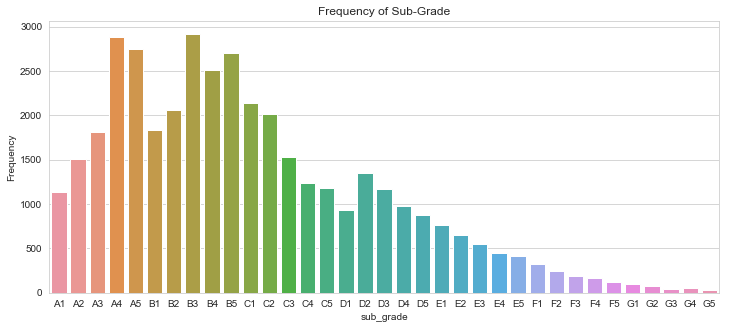

Plot 1:
	The most frequent sub-grade for loans is B3 and 2nd top most is A4.


In [34]:
#-------------------------------------------------------------------
#        Ordered Categorical Plot 1 : Sub-Grade
#-------------------------------------------------------------------
             
Frequency_of_sub_grade = df_master.groupby('sub_grade').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='sub_grade', y='Frequency', data=Frequency_of_sub_grade)
plt.title("Frequency of Sub-Grade")

plt.show()

print('Plot 1:\n\tThe most frequent sub-grade for loans is B3 and 2nd top most is A4.')

### Unordered Categorical Variables (few fields analysis)
    1.Loan_status
    2.Purpose
    3.Home_ownership
    4.Verification_status

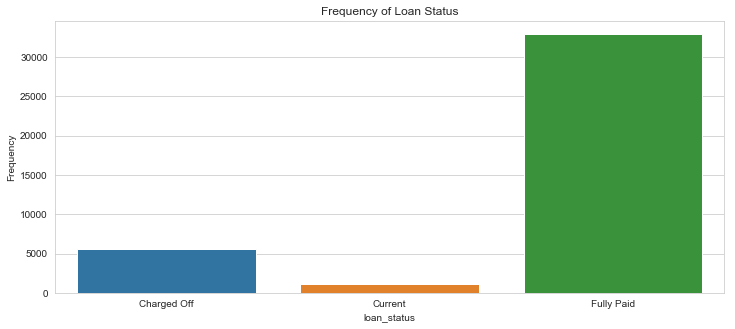

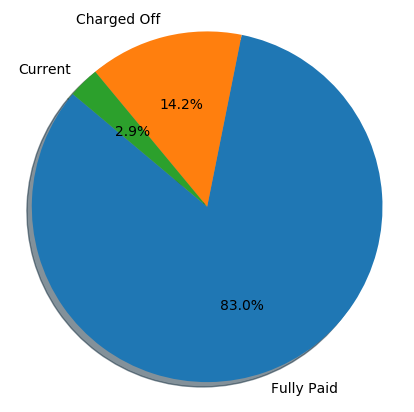

-------------Categorical Plot 1 : Loan Status----------------------------

Plot 1 : Loan Status shows that Most of the loans in the data set are fully paid and	only a small percentage of loans are current loans.


In [35]:
#-------------------------------------------------------------------
#        Unordered Categorical Plot 1 : Loan Status
#-------------------------------------------------------------------
loan_status = pd.DataFrame(df_master['loan_status'].value_counts())

    
Frequency_of_loan_status = df_master.groupby('loan_status').size().reset_index(name='Frequency')
Frequency_of_loan_status
plt.figure(figsize=(12, 5))
#plt.subplot(2,2,1)
sns.barplot(x='loan_status', y='Frequency', data=Frequency_of_loan_status)
plt.title("Frequency of Loan Status")

plt.show()


# Plot

chart_label_loan_status = ["Fully Paid","Charged Off","Current"]

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(5, 5))
plt.pie(loan_status, labels=chart_label_loan_status,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

print('-------------Categorical Plot 1 : Loan Status----------------------------')
print('\nPlot 1 : Loan Status shows that Most of the loans in the data set are fully paid and'
      '\tonly a small percentage of loans are current loans.')

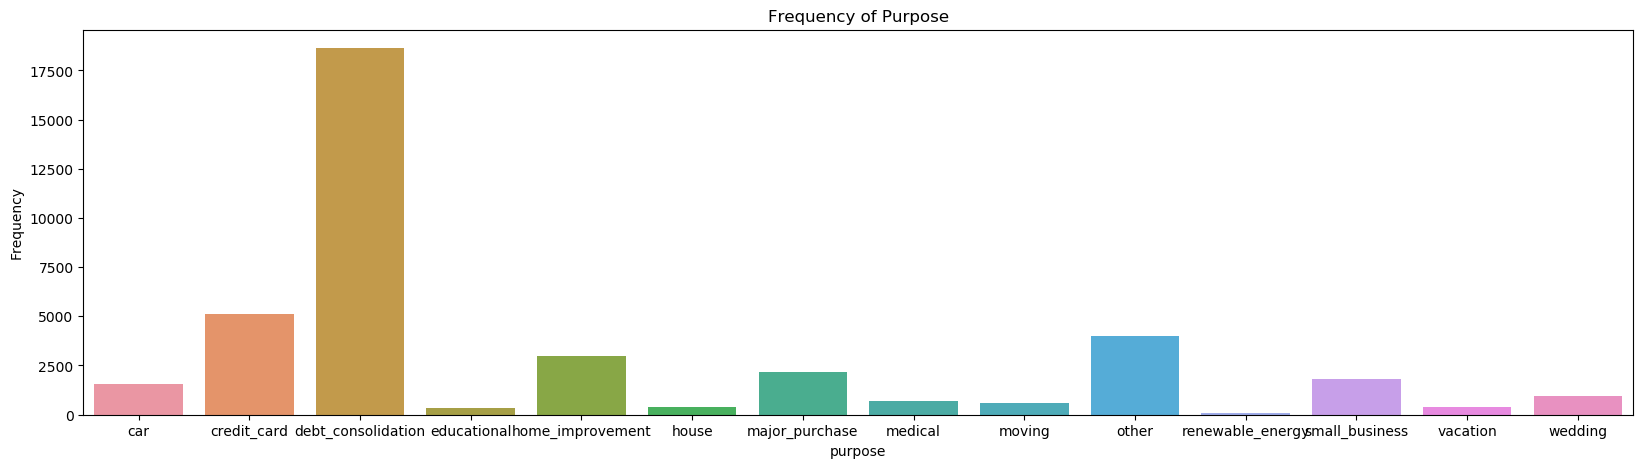

-------------Categorical Plot 2 : Purpose----------------------------

Plot 2 : Most of the loans are taken for the purpose of debt_consolidation


In [36]:
#-------------------------------------------------------------------
#               ##Unordered Categorical Plot 2 : Purpose
#-------------------------------------------------------------------  
Frequency_of_purpose = df_master.groupby('purpose').size().reset_index(name='Frequency')
plt.figure(figsize=(20, 5))
sns.barplot(x='purpose', y='Frequency', data=Frequency_of_purpose)
plt.title("Frequency of Purpose")

plt.show()
print('-------------Categorical Plot 2 : Purpose----------------------------')
print('\nPlot 2 : Most of the loans are taken for the purpose of debt_consolidation')

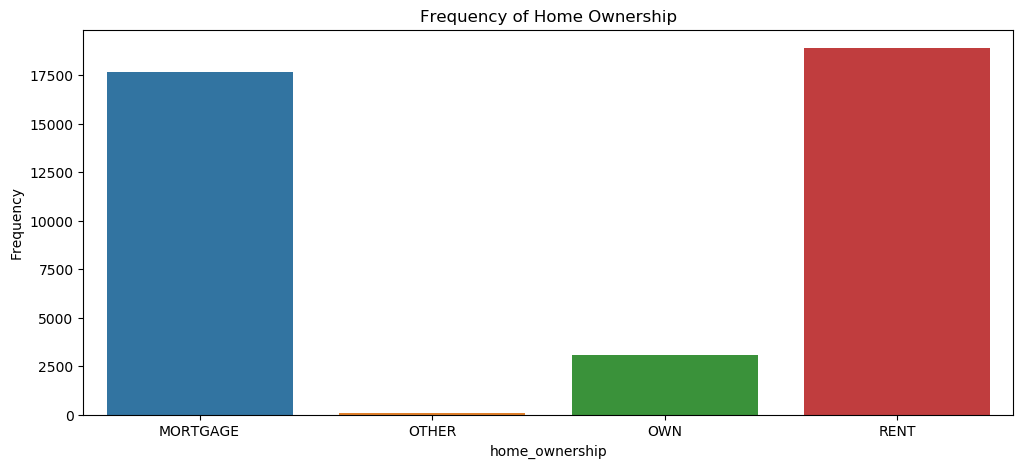


Plot 3 :
	People who are staying on rented house are taking most of the loans, 
	Followed by people staying in a mortgaged home.


In [37]:
#-------------------------------------------------------------------
#               ##Unordered Categorical Plot 3 : Home_ownership  
#------------------------------------------------------------------- 

Frequency_of_home_ownership = df_master.groupby('home_ownership').size().reset_index(name='Frequency')
Frequency_of_home_ownership
plt.figure(figsize=(12, 5))
sns.barplot(x='home_ownership', y='Frequency', data=Frequency_of_home_ownership)
plt.title("Frequency of Home Ownership")

plt.show()
print('\nPlot 3 :\n\tPeople who are staying on rented house are taking most of the loans,',
      '\n\tFollowed by people staying in a mortgaged home.')

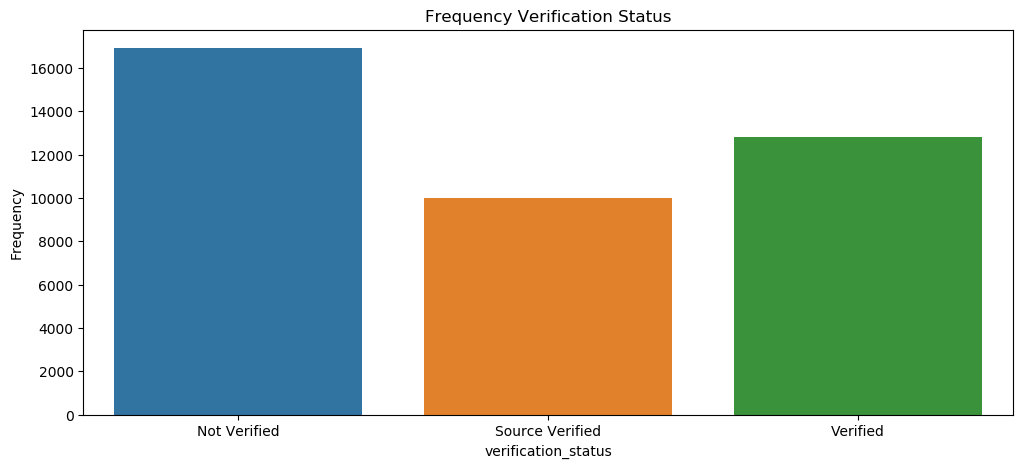

-------------Categorical Plot 4 : Verification status----------------------------

Plot 4 : Most of the loans data are not verified


In [38]:
#-------------------------------------------------------------------
#               ##Unordered Categorical Plot 4 : verification_status 
#------------------------------------------------------------------- 

Frequency_verification_status = df_master.groupby('verification_status').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='verification_status', y='Frequency', data=Frequency_verification_status)
plt.title("Frequency Verification Status")

plt.show()

print('-------------Categorical Plot 4 : Verification status----------------------------')
print('\nPlot 4 : Most of the loans data are not verified')

###### min and max percentile
we are setting 1% for outlier removal

In [39]:
minPercent = 0.01
maxPercent = 0.99

In [40]:
#### Calculating the outliners
minOutliner_funded_amnt_inv = df_master['funded_amnt_inv'].quantile(minPercent)
maxOutliner_funded_amnt_inv = df_master['funded_amnt_inv'].quantile(maxPercent)

print("funded_amnt_inv Details:")
print("Mean: %s \n25th Percentile: %s \n75th Percentile %s \n"%(df_master['funded_amnt_inv'].mean(),df_master['funded_amnt_inv'].quantile(0.25),df_master['funded_amnt_inv'].quantile(0.75)))

funded_amnt_inv_outliersSize = df_master[(df_master["funded_amnt_inv"] < minOutliner_funded_amnt_inv)]['funded_amnt_inv'].size+df_master[(df_master["funded_amnt_inv"] > maxOutliner_funded_amnt_inv)]['funded_amnt_inv'].size
print("funded_amnt_inv outlier range:")
print("lower range:%s \nupper range:%s \nNumber of Outliers:%s"%(minOutliner_funded_amnt_inv,maxOutliner_funded_amnt_inv,funded_amnt_inv_outliersSize))


funded_amnt_inv Details:
Mean: 10398.113989 
25th Percentile: 5000.0 
75th Percentile 14400.0 

funded_amnt_inv outlier range:
lower range:675.0 
upper range:34750.0 
Number of Outliers:769


In [41]:
# Now we are removing the outliners
removed_loan_outlier = df_master[((df_master["funded_amnt_inv"] > minOutliner_funded_amnt_inv)&(df_master["funded_amnt_inv"] < maxOutliner_funded_amnt_inv))]
removed_loan_outlier.shape

(38909, 22)

In [42]:
#### Calculating the outliners
minOutliner_annual_inc = df_master['annual_inc'].quantile(minPercent)
maxOutliner_annual_inc = df_master['annual_inc'].quantile(maxPercent)

print("annual_inc Details:")
print("Mean: %s \n25th Percentile: %s \n75th Percentile %s \n"%(df_master['annual_inc'].mean(),df_master['annual_inc'].quantile(0.25),df_master['annual_inc'].quantile(0.75)))

annual_inc_outliers = df_master[(df_master["annual_inc"] < minOutliner_annual_inc)]['annual_inc'].size+df_master[(df_master["annual_inc"] > maxOutliner_annual_inc)]['annual_inc'].size
print("annual_inc outlier range:")
print("lower range:%s \nupper range:%s \nNumber of Outliers:%s"%(minOutliner_annual_inc,maxOutliner_annual_inc,annual_inc_outliers))

annual_inc Details:
Mean: 68968.0376925 
25th Percentile: 40404.5 
75th Percentile 82299.0 

annual_inc outlier range:
lower range:14400.0 
upper range:234999.48 
Number of Outliers:726


In [43]:
# Now we are removing the outliners
loan_outlier_removed = df_master[((df_master["annual_inc"] > minOutliner_annual_inc)&(df_master["annual_inc"] < minOutliner_annual_inc))]
loan_outlier_removed.shape

(0, 22)

### Quantitative Variables

For analysis below quantitative variables we are going to use below fields,

    1.delinq_2yrs
    2.funded_amnt_inv
    3.loan_amt
    4.int_rate
    5.pub_rec_bankruptcies
    6.Emp_length
    7.term

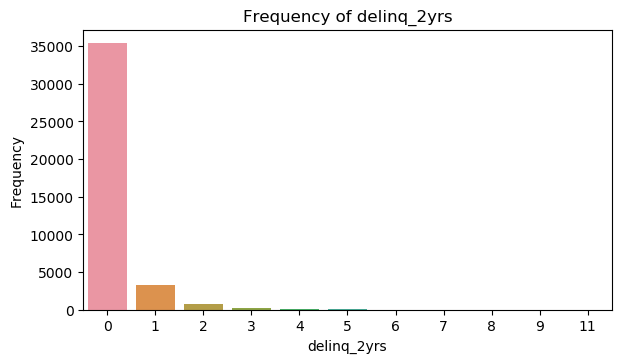

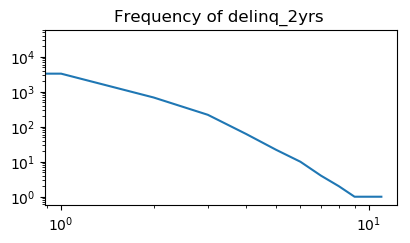

Plot 1:
	From the 'delinq_2yrs' most highest frequency is 0.


In [44]:
#-------------------------------------------------------------------
#               ##Quantitative Plot 1 : delinq_2yrs  
#-------------------------------------------------------------------

Frequency_of_delinq_2yrs = df_master.groupby('delinq_2yrs').size().reset_index(name='Frequency')
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
sns.barplot(x='delinq_2yrs', y='Frequency', data=Frequency_of_delinq_2yrs)
plt.title("Frequency of delinq_2yrs")

plt.show()

####plot 2
# delinq_2yrs  log log graph      
plt.figure(figsize=(10, 5))
plt.subplot(2,2,2)
plt.xscale('log')
plt.yscale('log')
plt.plot('delinq_2yrs','Frequency',data=Frequency_of_delinq_2yrs)
plt.title("Frequency of delinq_2yrs ")

plt.show()

print('Plot 1:\n\tFrom the \'delinq_2yrs\' most highest frequency is 0.')

Mean of funded_amnt_inv =  10398.11
Median of funded_amnt_inv =  8975.0
Mode of funded_amnt_inv =  0    5000.0
dtype: float64


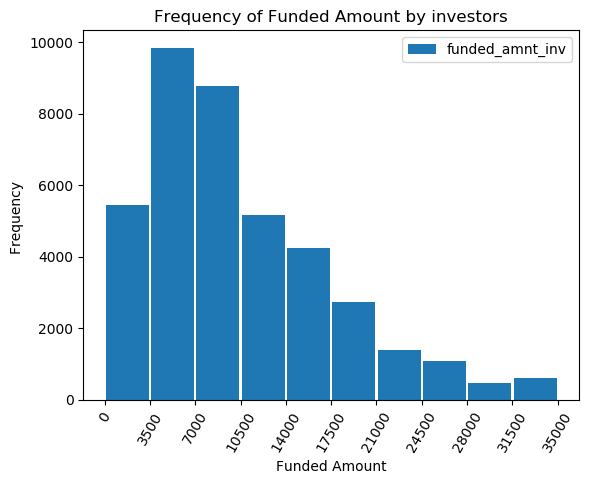

Plot 2:
	From the 'Funded Amount investors' most frequently invested is between $3500 to $7000 . But there are clearly some outliers above 98 percentile.


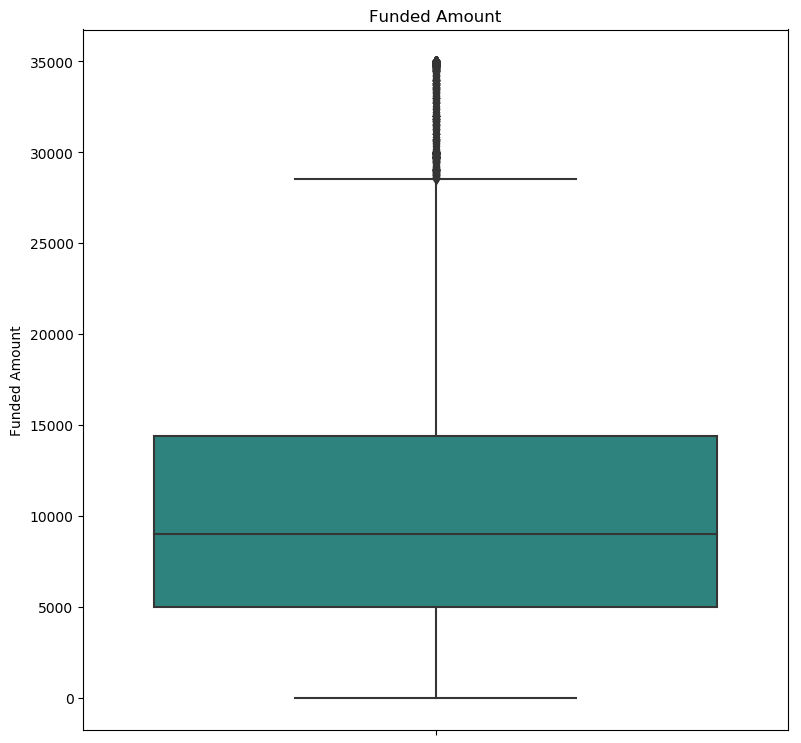

In [45]:
#-------------------------------------------------------------------
#               ##Quantitative Plot 2 : #funded_amnt_inv  
#-------------------------------------------------------------------

print('Mean of funded_amnt_inv = ', round(df_master.funded_amnt_inv.mean(), 2))
print('Median of funded_amnt_inv = ', df_master.funded_amnt_inv.median())
print('Mode of funded_amnt_inv = ', df_master.funded_amnt_inv.mode())

#Frequency Chart
funded_amnt_inv = df_master['funded_amnt_inv']
legend = ['funded_amnt_inv']
plt.hist([funded_amnt_inv], bins=10, rwidth=0.95)
plt.xlabel("Funded Amount")
plt.ylabel("Frequency ")
plt.xticks(np.arange(min(funded_amnt_inv), max(funded_amnt_inv)+3500, 3500), rotation=60)
plt.legend(legend)
plt.title('Frequency of Funded Amount by investors')
plt.show()

# Plotting the distribution plot of funded_amnt_inv to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(y=df_master['funded_amnt_inv'], palette='viridis')
plt.ylabel('Funded Amount')
plt.title('Funded Amount')


print('Plot 2:\n\tFrom the \'Funded Amount investors\' most frequently invested is between $3500 to $7000 .',
      'But there are clearly some outliers above 98 percentile.')


loan amount
	Mean = 11219.8683084
	Median = 10000.0
	Mode = 0    10000
dtype: int64


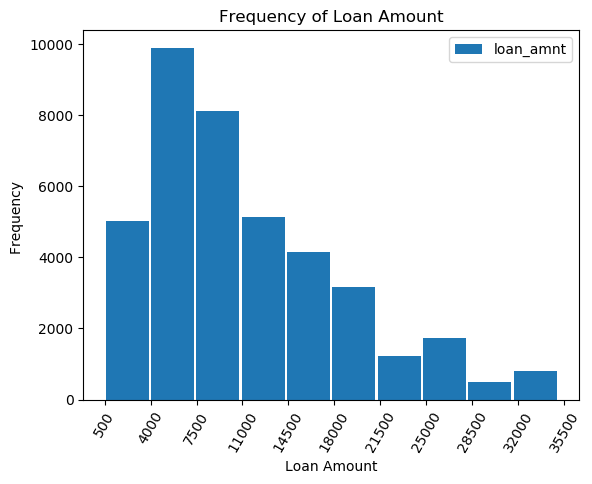

Plot 3:
	The 'Loan Amount' most frequently taken is between $4000 to $7500. But there are clearly some outliers above 98 percentile.


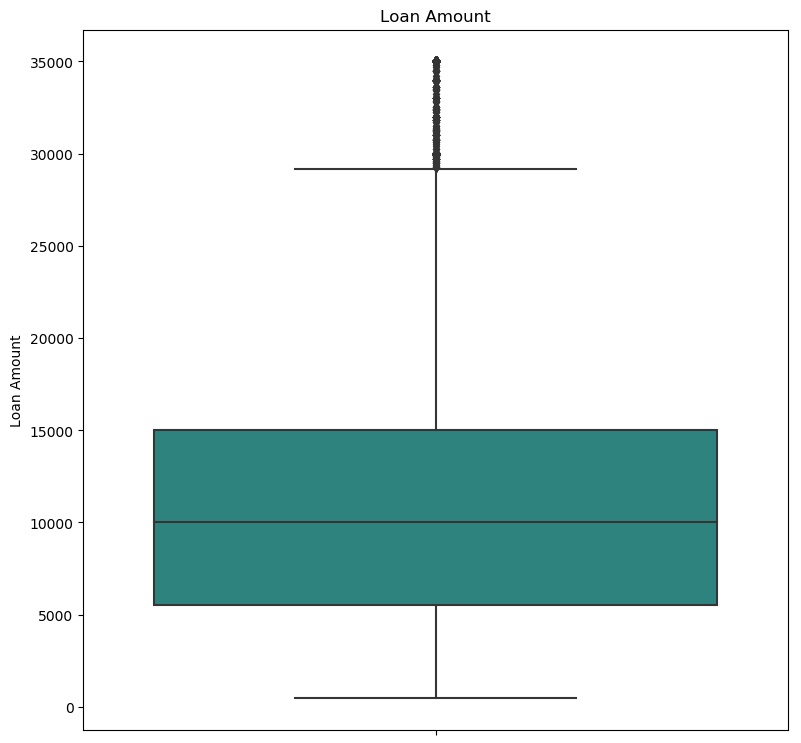

In [46]:
#-------------------------------------------------------------------
#               ##Quantitative Plot 3 : Loan Amount 
#-------------------------------------------------------------------


print('\nloan amount')
print('\tMean =',  df_master.loan_amnt.mean())
print('\tMedian =', df_master.loan_amnt.median())
print('\tMode =',  df_master.loan_amnt.mode())
#Frequency Chart
loan_amnt = df_master['loan_amnt']
legend = ['loan_amnt']
#plt.subplot(2,2,1)
plt.hist([loan_amnt],  bins=10, rwidth=0.95)
plt.xlabel("Loan Amount")
plt.ylabel("Frequency ")
plt.xticks(np.arange(min(loan_amnt), max(loan_amnt)+3500, 3500), rotation=60)
plt.legend(legend)
plt.title('Frequency of Loan Amount')
plt.show()


# Plotting the distribution plot of loan_amnt to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,2)
sns.boxplot(y=df_master['loan_amnt'], palette='viridis')
plt.ylabel('Loan Amount')
plt.title('Loan Amount')

print('Plot 3:\n\tThe \'Loan Amount\' most frequently taken is between $4000 to $7500.',
      'But there are clearly some outliers above 98 percentile.')

Mean of int_rate =  12.02
Median of int_rate =  11.86
Mode of int_rate =  0    10.99
dtype: float64


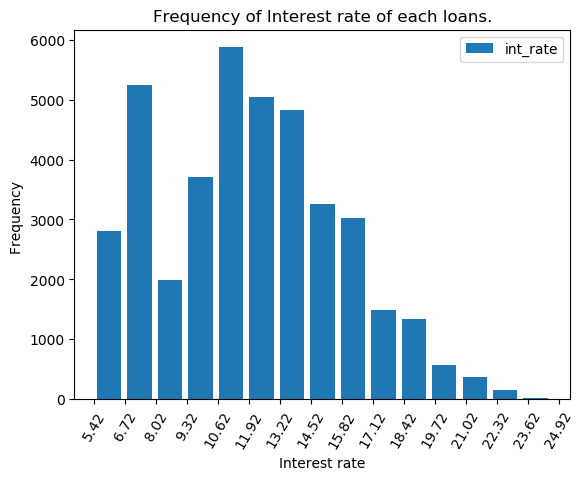

Plot 4:
	From the 'Interest rate' most frequent Interest rate is between 10.6% to 11.9% . But there are clearly some outliers above 98 percentile.


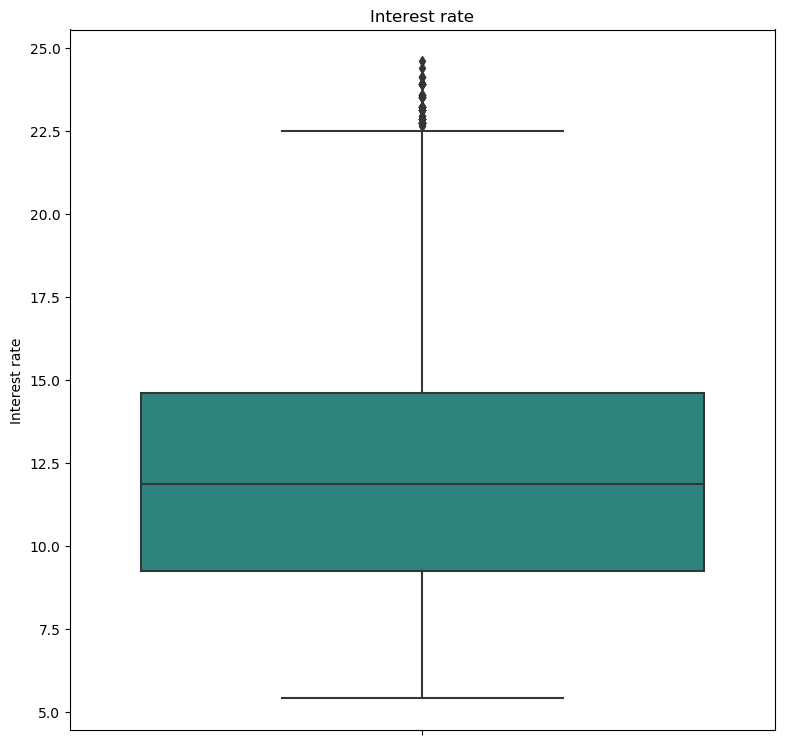

In [47]:
#-------------------------------------------------------------------
#               ##Quantitative Plot 4 : int_rate 
#-------------------------------------------------------------------


print('Mean of int_rate = ', round(df_master.int_rate.mean(), 2))
print('Median of int_rate = ', df_master.int_rate.median())
print('Mode of int_rate = ', df_master.int_rate.mode())

#Frequency Chart
int_rate = df_master['int_rate']
legend = ['int_rate']
plt.hist([int_rate], bins=15, rwidth=0.80)
plt.xlabel("Interest rate")
plt.ylabel("Frequency ")
plt.xticks(np.arange(min(int_rate), max(int_rate)+1.3, 1.3), rotation=60)
plt.legend(legend)
plt.title('Frequency of Interest rate of each loans.')
plt.show()
# Plotting the distribution plot of int_rate to visualise their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,2)
sns.boxplot(y=df_master['int_rate'], palette='viridis')
plt.ylabel('Interest rate')
plt.title('Interest rate')


print('Plot 4:\n\tFrom the \'Interest rate\' most frequent Interest rate is between 10.6% to 11.9% .',
      'But there are clearly some outliers above 98 percentile.')

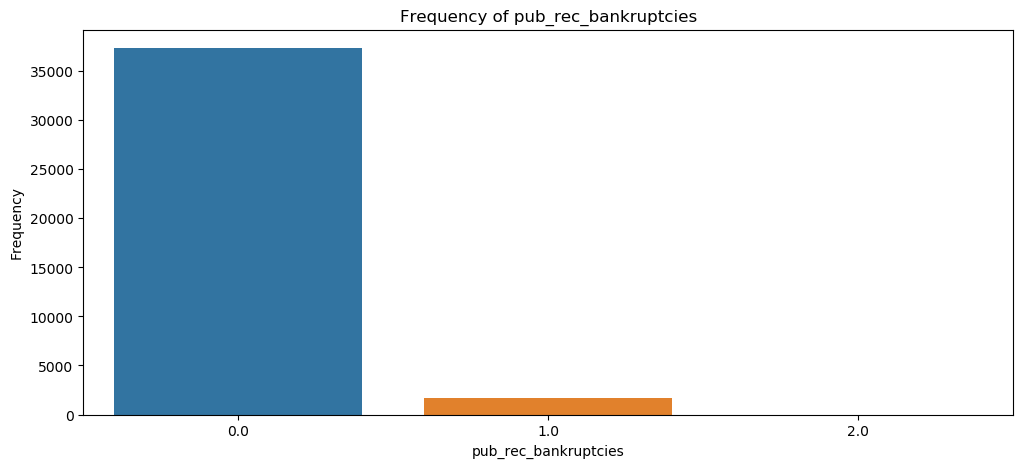

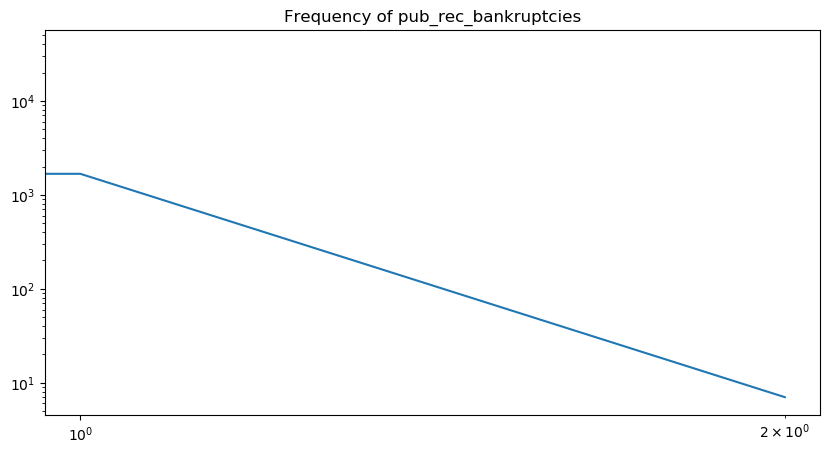

Plot 5: 
Most of the pub_rec values are 0.There are outliers in the  column and the max value is 4. 



In [48]:
#-------------------------------------------------------------------
#               ##Quantitative Plot 5 : pub_rec_bankruptcies 
#-------------------------------------------------------------------

#Frequency Chart 
Frequency_pub_rec_bankruptcies = df_master.groupby('pub_rec_bankruptcies').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='pub_rec_bankruptcies', y='Frequency', data=Frequency_pub_rec_bankruptcies)
plt.title("Frequency of pub_rec_bankruptcies")

plt.show()

#plot
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.yscale('log')
plt.plot('pub_rec_bankruptcies','Frequency',data=Frequency_pub_rec_bankruptcies)
plt.title("Frequency of pub_rec_bankruptcies")

plt.show()

print('Plot 5: \nMost of the pub_rec values are 0.There are outliers in the  column and the max value is 4. \n')

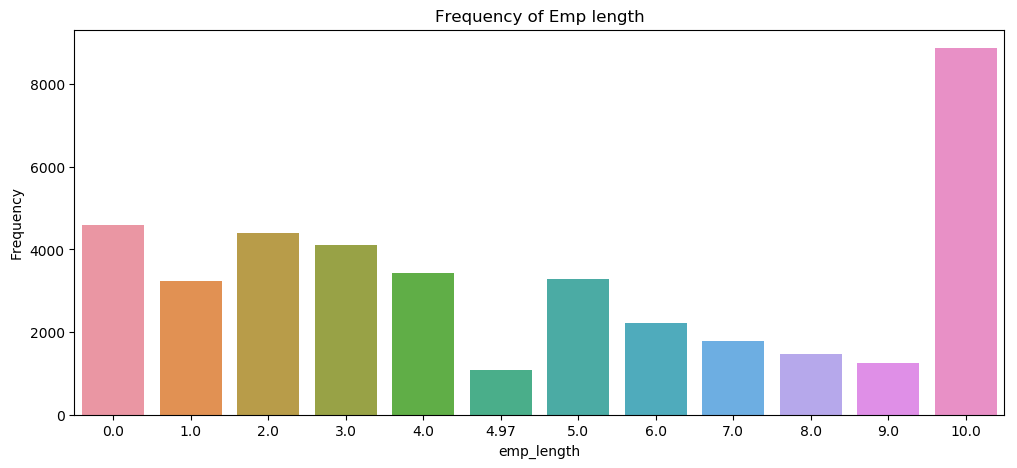

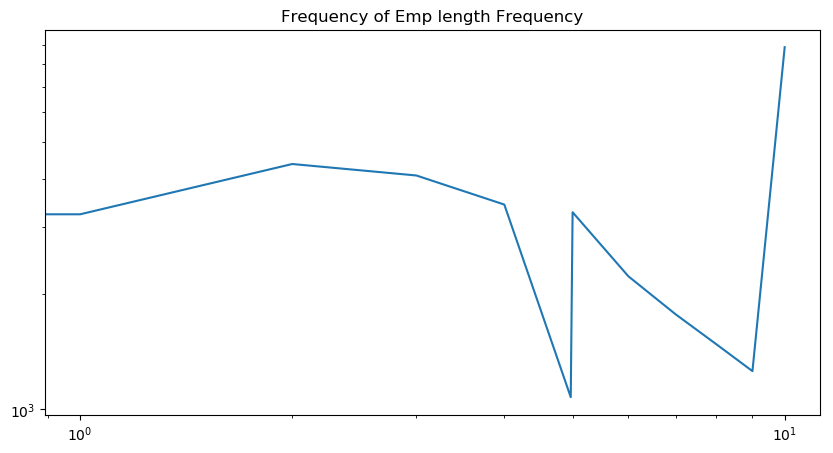

Plot 6:
	The most frequent employee length are 10 or more than 10 yrs.


In [49]:
#-------------------------------------------------------------------
#               ##Quantitative Plot 6 : Emp_length 
#-------------------------------------------------------------------

Frequency_of_emp_length = df_master.groupby('emp_length').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='emp_length', y='Frequency', data=Frequency_of_emp_length)
plt.title("Frequency of Emp length")

plt.show()

###plot
# emp_length  log log graph      
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.yscale('log')
plt.plot('emp_length','Frequency',data=Frequency_of_emp_length)
plt.title("Frequency of Emp length Frequency")

plt.show()

print('Plot 6:\n\tThe most frequent employee length are 10 or more than 10 yrs.')

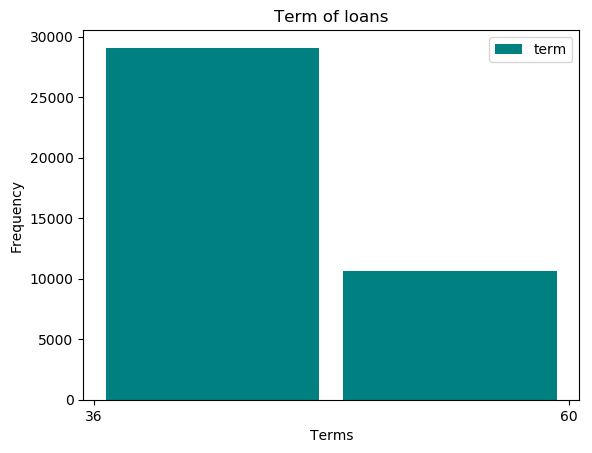

Plot 7:
	The most frequent term for loans is 36 months.


In [50]:
#-------------------------------------------------------------------
#               Quantitative Plot 7 : term
#-------------------------------------------------------------------

terms = df_master['term']

legend = ['term']
plt.hist([terms], bins=2, rwidth=0.90, color='teal')
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.xticks(terms.unique())
plt.legend(legend)
plt.title('Term of loans')
plt.show()

print('Plot 7:\n\tThe most frequent term for loans is 36 months.')

### Analysis on 'Loan issue years'

Plot:
	The most loans has been issued on the year of 2011.


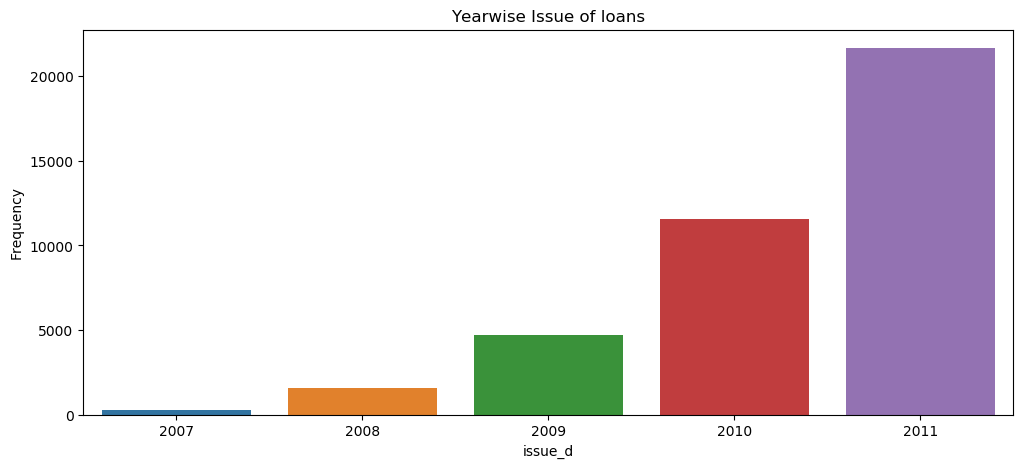

In [51]:
#------------------------------------------------------------------
# The variable issue_d is an Ordered Categorical variable.
#------------------------------------------------------------------

# Plot year wise bar chart of issue_d column 
yearwise_loans_issued =df_master.groupby(df_master.issue_d.dt.year).size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='issue_d', y='Frequency', data=yearwise_loans_issued)
plt.title("Yearwise Issue of loans")

print('Plot:\n\tThe most loans has been issued on the year of 2011.')

## Segmented Univariate Analysis

The basis of segmentation is to create segments based on the categorical variable and compare the average / aggregated metrics.

In the loan dataset, Let us list out the categorical variables available

* terms
* loan status
* home ownership
* verification status
* addr state

#### Analysis on term segmented with loan_status, grade, verifcation_status, addr_state, home_ownership

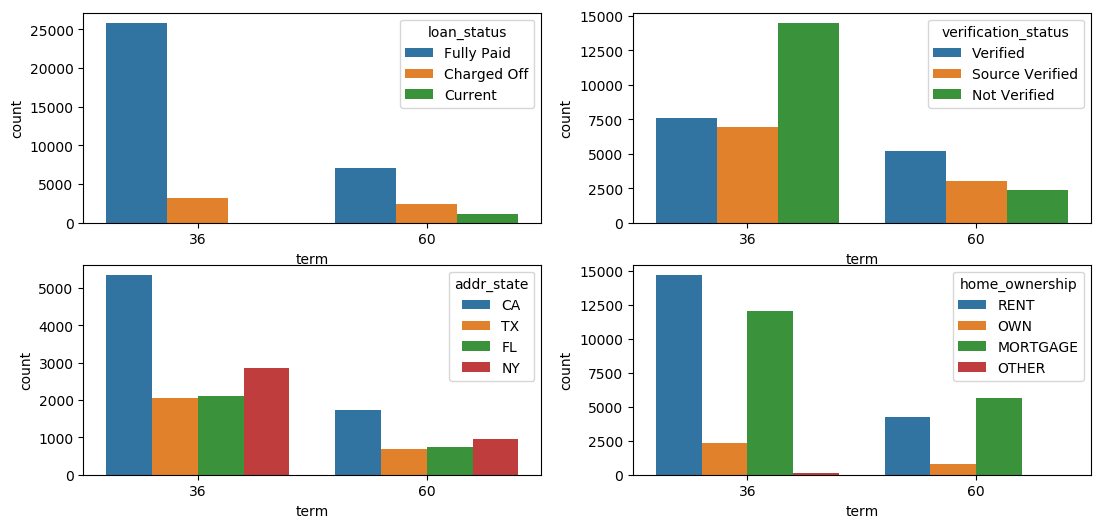

In [52]:
#------------------------------------------------------------------
# Analysis of terms with different parameters 
#------------------------------------------------------------------

# plot term with loan status, verifcation_status, addr_state, home_ownership
plt.figure(figsize=(13,6))
plt.subplot(2,2,1)
sns.countplot(x='term', hue='loan_status',data=df_master)

plt.subplot(2,2,2)
sns.countplot(x='term', hue='verification_status',data=df_master)

plt.subplot(2,2,3)
sns.countplot(x='term', hue='addr_state',data=df_master[df_master.addr_state.isin(df_master.addr_state.value_counts().index[0:4])])

plt.subplot(2,2,4)
sns.countplot(x='term', hue='home_ownership',data=df_master)

In [53]:
print('Term Segmentation Analysis:')
print('\n With Loan Status: 60 Months term loans are higher chance of defaulters.'
      '\n With Verification Status: 36 Months terms loan has not properly verified'
      '\n With Addrstate: 36 Months loans highly distributed in CA and then to NY state'
      '\n With Home Ownership: Rented persons are mostly applied for loans')

Term Segmentation Analysis:

 With Loan Status: 60 Months term loans are higher chance of defaulters.
 With Verification Status: 36 Months terms loan has not properly verified
 With Addrstate: 36 Months loans highly distributed in CA and then to NY state
 With Home Ownership: Rented persons are mostly applied for loans


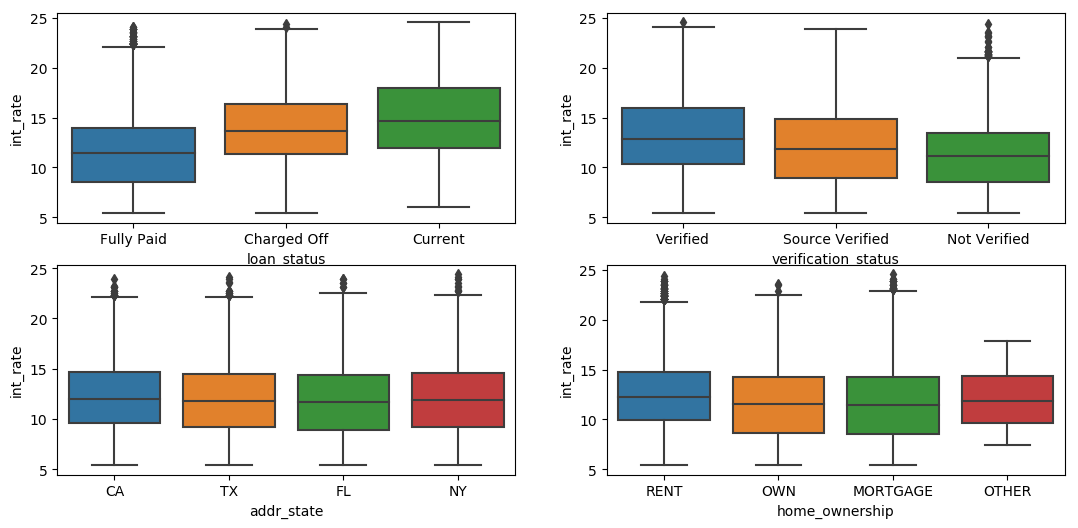

In [54]:
#------------------------------------------------------------------
# Analysis of int_rate with different parameters 
#------------------------------------------------------------------

# plot int_rate with loan status, verifcation_status, addr_state, home_ownership
plt.figure(figsize=(13,6))
plt.subplot(2,2,1)
sns.boxplot(y='int_rate', x='loan_status',data=df_master)

plt.subplot(2,2,2)
sns.boxplot(y='int_rate', x='verification_status',data=df_master)

plt.subplot(2,2,3)
sns.boxplot(y='int_rate', x='addr_state',data=df_master[df_master.addr_state.isin(df_master.addr_state.value_counts().index[0:4])])

plt.subplot(2,2,4)
sns.boxplot(y='int_rate', x='home_ownership',data=df_master)

In [55]:
print('Interest rate Segmentation Analysis:')
print('\n With Loan Status: Interest rates are higher for Charged off and current loans.'
      '\n With Verification Status: Most loans has been source verified.'
      '\n With Addrstate: No significant difference observed in this analysis'
      '\n With Home Ownership: Interest rates are bit higher for the persons who stays in rents flats.')

Interest rate Segmentation Analysis:

 With Loan Status: Interest rates are higher for Charged off and current loans.
 With Verification Status: Most loans has been source verified.
 With Addrstate: No significant difference observed in this analysis
 With Home Ownership: Interest rates are bit higher for the persons who stays in rents flats.


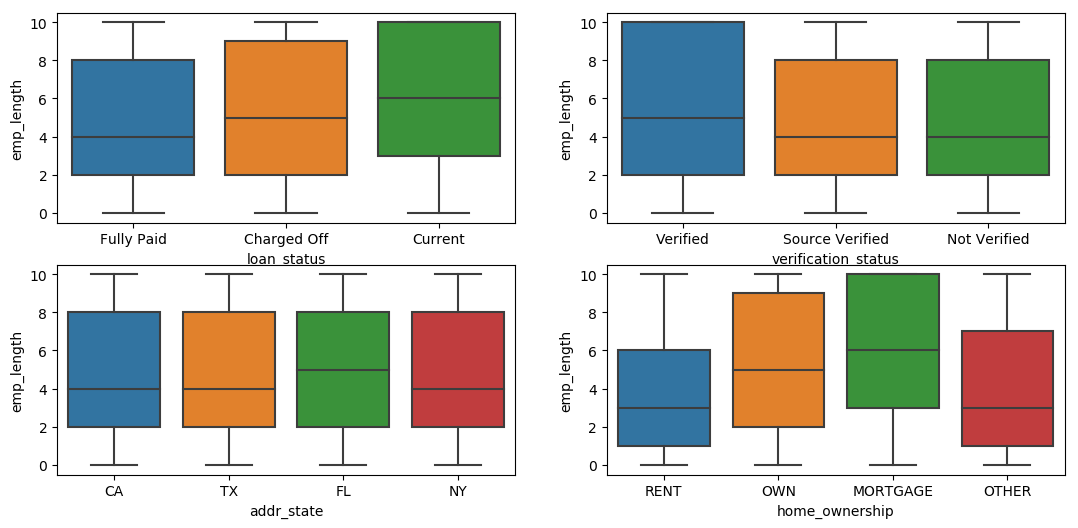

In [56]:
#------------------------------------------------------------------
# Analysis of emp_length with different parameters 
#------------------------------------------------------------------

# plot emp_length with loan status,verifcation_status,addr_state, home_ownership
plt.figure(figsize=(13,6))
plt.subplot(2,2,1)
sns.boxplot(y='emp_length', x='loan_status',data=df_master)

plt.subplot(2,2,2)
sns.boxplot(y='emp_length', x='verification_status',data=df_master)

plt.subplot(2,2,3)
sns.boxplot(y='emp_length', x='addr_state',data=df_master[df_master.addr_state.isin(df_master.addr_state.value_counts().index[0:4])])

plt.subplot(2,2,4)
sns.boxplot(y='emp_length', x='home_ownership',data=df_master)

In [57]:
print('Employee Length Segmentation Analysis:')
print('\n With Loan Status: Employee length is higher for Charged-off status.'
      '\n With Verification Status: Most of loans are properly verified'
      '\n With Addrstate: No significant difference with addstate data'
      '\n With Home Ownership: loan length is higher for the people who stays in own or Mortagate hosue')

Employee Length Segmentation Analysis:

 With Loan Status: Employee length is higher for Charged-off status.
 With Verification Status: Most of loans are properly verified
 With Addrstate: No significant difference with addstate data
 With Home Ownership: loan length is higher for the people who stays in own or Mortagate hosue


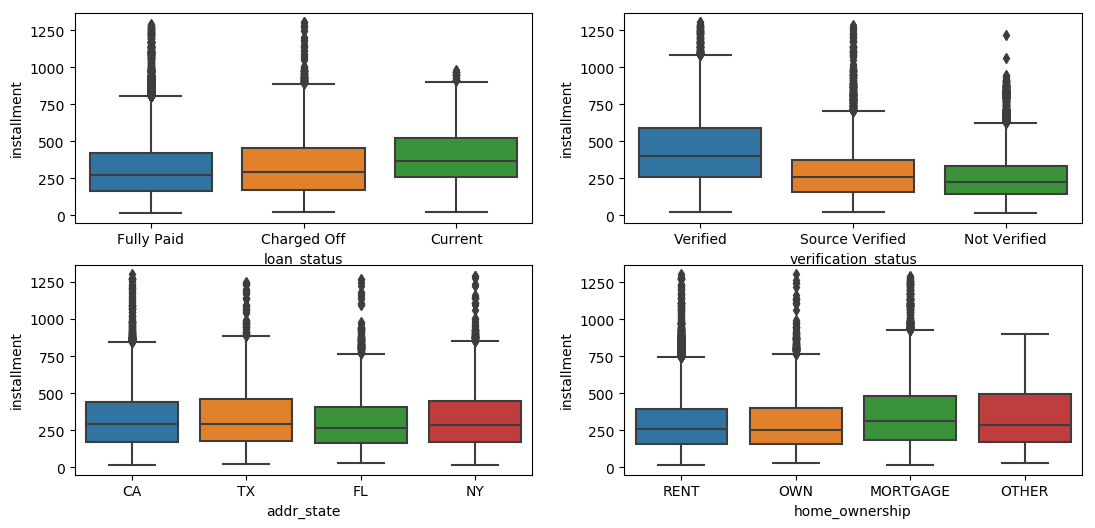

In [58]:
#------------------------------------------------------------------
# Analysis of installments with different parameters 
#------------------------------------------------------------------

# plot installment with loan status,verifcation_status, addr_state, home_ownership
plt.figure(figsize=(13,6))
plt.subplot(2,2,1)
sns.boxplot(y='installment', x='loan_status',data=df_master)

plt.subplot(2,2,2)
sns.boxplot(y='installment', x='verification_status',data=df_master)

plt.subplot(2,2,3)
sns.boxplot(y='installment', x='addr_state',data=df_master[df_master.addr_state.isin(df_master.addr_state.value_counts().index[0:4])])

plt.subplot(2,2,4)
sns.boxplot(y='installment', x='home_ownership',data=df_master)

In [59]:
print('Installments Segmentation Analysis:')
print('\n With Loan Status: Installments are same for Fully paid and charged-off loans.'
      '\n With Verification Status: Installments are higher for verified loans.'
      '\n With Addrstate: No significant difference.'
      '\n With Home Ownership: 36 Months terms loan has not properly verified')

Installments Segmentation Analysis:

 With Loan Status: Installments are same for Fully paid and charged-off loans.
 With Verification Status: Installments are higher for verified loans.
 With Addrstate: No significant difference.
 With Home Ownership: 36 Months terms loan has not properly verified


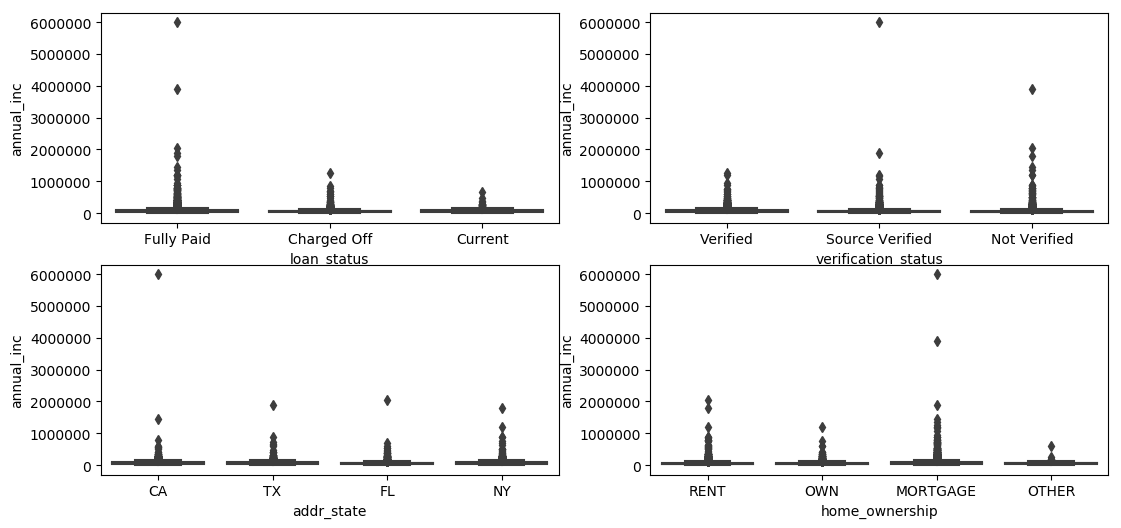

In [60]:
#------------------------------------------------------------------
# Analysis of Annual Income with different parameters 
#------------------------------------------------------------------

# plot annual_inc with loan status, verifcation_status,addr_state, home_ownership
plt.figure(figsize=(13,6))
plt.subplot(2,2,1)
sns.boxplot(y='annual_inc', x='loan_status',data=df_master)

plt.subplot(2,2,2)
sns.boxplot(y='annual_inc', x='verification_status',data=df_master)

plt.subplot(2,2,3)
sns.boxplot(y='annual_inc', x='addr_state',data=df_master[df_master.addr_state.isin(df_master.addr_state.value_counts().index[0:4])])

plt.subplot(2,2,4)
sns.boxplot(y='annual_inc', x='home_ownership',data=df_master)

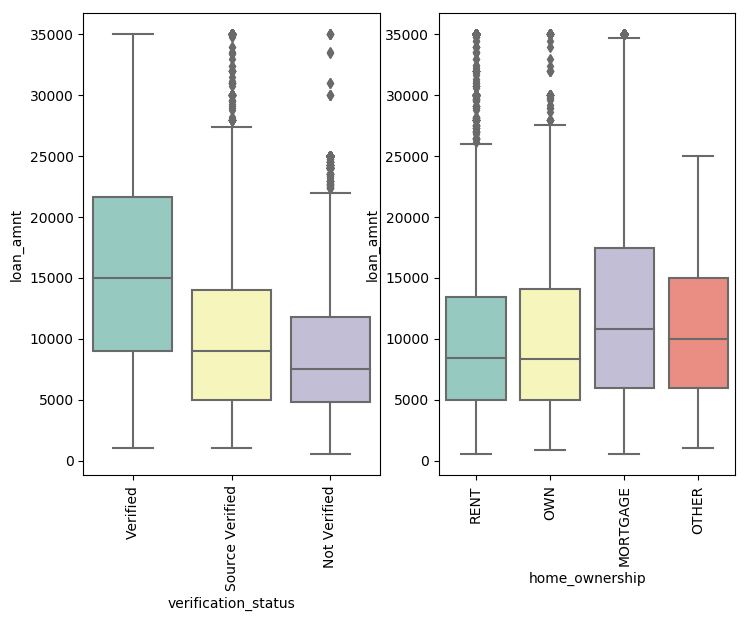

In [61]:
#------------------------------------------------------------------
# Analysis of Loan Amount with different parameters 
#------------------------------------------------------------------

# Segmenting loan_amnt with verification_status, home_ownership
plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
p = sns.boxplot(x='verification_status', y='loan_amnt', data=df_master,palette="Set3")
plt.setp(p.get_xticklabels(), rotation=90)

plt.subplot(1,3,2)
p = sns.boxplot(x='home_ownership', y='loan_amnt', data=df_master,palette="Set3")
plt.setp(p.get_xticklabels(), rotation=90)

plt.show()

In [62]:
print('Loan Amount Segmentation Analysis:')
print('\n With Verification Status: Higher loans are taken by the verified people.'
      '\n With Home Ownership: Loan amount is higher for the mortgate properties')

Loan Amount Segmentation Analysis:

 With Verification Status: Higher loans are taken by the verified people.
 With Home Ownership: Loan amount is higher for the mortgate properties


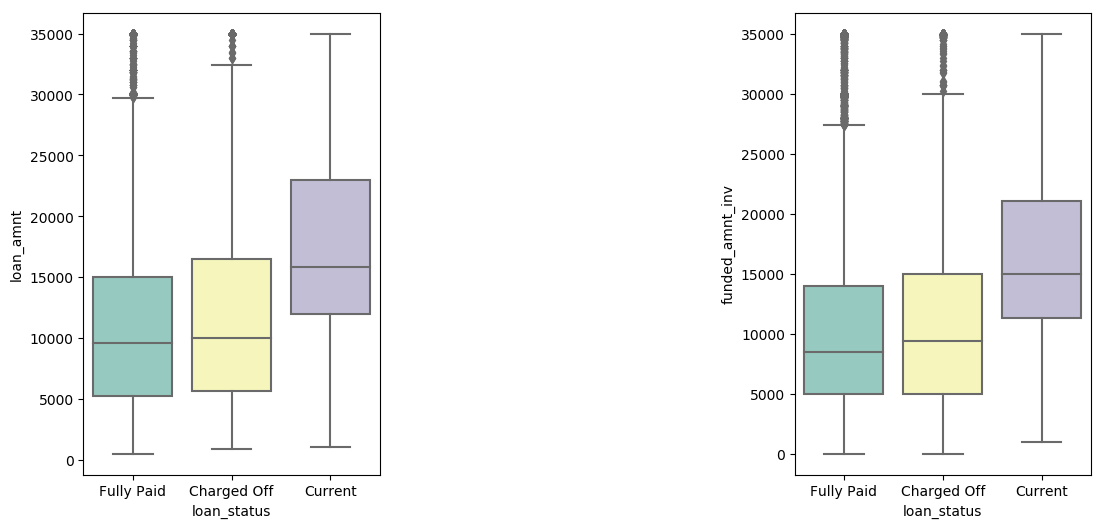

In [63]:
#------------------------------------------------------------------
# Analysis of Loan Status with different parameters 
#------------------------------------------------------------------

# Segmenting loan_amnt, funded_amnt_inv with loan_status
plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
sns.boxplot(x='loan_status', y='loan_amnt', data=df_master,palette="Set3")

plt.subplot(1,3,3)
sns.boxplot(x='loan_status', y='funded_amnt_inv', data=df_master,palette="Set3")


In [64]:
print('Loan Status Segmentation Analysis:')
print('\n With Loan Amount: Charge-off loans are higher loan amount but not more than current loans.'
      '\n With Funded Amount: Charged-off loan are slightly higher funded amount inv but not more than current loan.')

Loan Status Segmentation Analysis:

 With Loan Amount: Charge-off loans are higher loan amount but not more than current loans.
 With Funded Amount: Charged-off loan are slightly higher funded amount inv but not more than current loan.


# Derived Matrics

We can derive a new column by the name `loan_default_stat`, which will consist of the following 2 distinct categories:
1. `Defaulter` (if that particular person's loan status is `charged off`)
2. `Non-Defaulter` (if the loan status is `Fully Paid` or `Current`)

In [65]:
df_master['loan_default_stat'] = df_master['loan_status'].apply(lambda x: 'Defaulter'
                                                                        if x == 'Charged Off' else 'Non-Defaulter') 
df_master.info()

## For displaying the distribution of the column 'loan_default_stat'
df_master.groupby('loan_default_stat')['loan_default_stat'].count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39714 entries, 0 to 39716
Data columns (total 23 columns):
loan_amnt               39714 non-null int64
funded_amnt_inv         39714 non-null float64
term                    39714 non-null int64
int_rate                39714 non-null float64
installment             39714 non-null float64
sub_grade               39714 non-null object
emp_length              39714 non-null float64
home_ownership          39714 non-null object
annual_inc              39714 non-null float64
verification_status     39714 non-null object
issue_d                 39714 non-null datetime64[ns]
loan_status             39714 non-null object
purpose                 39714 non-null object
zip_code                39714 non-null object
addr_state              39714 non-null object
dti                     39714 non-null float64
delinq_2yrs             39714 non-null int64
open_acc                39714 non-null int64
pub_rec                 39714 non-null int64
revol_ut

loan_default_stat
Defaulter         5627
Non-Defaulter    34087
Name: loan_default_stat, dtype: int64

### New column `install_income_permonth`, which will give us the ratio of installment part of the income per month

In [66]:
df_master['install_income_permonth'] = round((df_master['installment'] / (df_master['annual_inc'] / 12)) * 100, 2)
df_master.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,address,loan_default_stat,install_income_permonth
0,5000,4975.0,36,10.65,162.87,B2,10.0,RENT,24000.0,Verified,...,AZ,27.65,0,3,0,83.7,0.0,"AZ,860",Non-Defaulter,8.14
1,2500,2500.0,60,15.27,59.83,C4,0.0,RENT,30000.0,Source Verified,...,GA,1.00,0,3,0,9.4,0.0,"GA,309",Defaulter,2.39
2,2400,2400.0,36,15.96,84.33,C5,10.0,RENT,12252.0,Not Verified,...,IL,8.72,0,2,0,98.5,0.0,"IL,606",Non-Defaulter,8.26
3,10000,10000.0,36,13.49,339.31,C1,10.0,RENT,49200.0,Source Verified,...,CA,20.00,0,10,0,21.0,0.0,"CA,917",Non-Defaulter,8.28
4,3000,3000.0,60,12.69,67.79,B5,1.0,RENT,80000.0,Source Verified,...,OR,17.94,0,15,0,53.9,0.0,"OR,972",Non-Defaulter,1.02
5,5000,5000.0,36,7.90,156.46,A4,3.0,RENT,36000.0,Source Verified,...,AZ,11.20,0,9,0,28.3,0.0,"AZ,852",Non-Defaulter,5.22
6,7000,7000.0,60,15.96,170.08,C5,8.0,RENT,47004.0,Not Verified,...,NC,23.51,0,7,0,85.6,0.0,"NC,280",Non-Defaulter,4.34
7,3000,3000.0,36,18.64,109.43,E1,9.0,RENT,48000.0,Source Verified,...,CA,5.35,0,4,0,87.5,0.0,"CA,900",Non-Defaulter,2.74
8,5600,5600.0,60,21.28,152.39,F2,4.0,OWN,40000.0,Source Verified,...,CA,5.55,0,11,0,32.6,0.0,"CA,958",Defaulter,4.57
9,5375,5350.0,60,12.69,121.45,B5,0.0,RENT,15000.0,Verified,...,TX,18.08,0,2,0,36.5,0.0,"TX,774",Defaulter,9.72


### New column `interest_rate_range`, this will help in specifying a range to the varied interest rates of the column 'int_rate'

In [67]:
# With the help of lambda function, we constructed the 'interest_rate_range' column from the existing 
# 'int_rate' column 
df_master['interest_rate_range'] = df_master['int_rate'].apply(lambda x :'0-5' if float(x)<=5 else ('5-10' 
                                                                                                      if float(x)<=10 else 
                                                                                                      ('10-15' if float(x)<=15 
                                                                                                       else ('15-20' if float(x)<=20 
                                                                                                             else('20-25' 
                                                                                                                  if float(x)<=25 
                                                                                                                  else '25+')))))

df_master[['int_rate','interest_rate_range']].head(10)

,int_rate,interest_rate_range
0,10.65,10-15
1,15.27,15-20
2,15.96,15-20
3,13.49,10-15
4,12.69,10-15
5,7.90,5-10
6,15.96,15-20
7,18.64,15-20
8,21.28,20-25
9,12.69,10-15


# Bivariate Analysis
### Corelation matrix for all the columns

In [68]:
corr_mat = round(df_master.corr(), 2)
corr_mat

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,install_income_permonth
loan_amnt,1.00,0.94,0.36,0.31,0.93,0.15,0.27,0.07,-0.03,0.18,-0.05,0.07,-0.04,0.51
funded_amnt_inv,0.94,1.00,0.36,0.31,0.91,0.16,0.25,0.07,-0.04,0.16,-0.05,0.07,-0.04,0.50
term,0.36,0.36,1.00,0.45,0.10,0.11,0.05,0.08,0.01,0.05,0.01,0.07,0.01,0.02
int_rate,0.31,0.31,0.45,1.00,0.28,0.01,0.05,0.11,0.16,0.01,0.10,0.47,0.08,0.18
installment,0.93,0.91,0.10,0.28,1.00,0.12,0.27,0.05,-0.02,0.17,-0.05,0.10,-0.03,0.57
emp_length,0.15,0.16,0.11,0.01,0.12,1.00,0.11,0.05,0.02,0.10,0.06,0.01,0.06,-0.04
annual_inc,0.27,0.25,0.05,0.05,0.27,0.11,1.00,-0.12,0.02,0.16,-0.02,0.02,-0.02,-0.25
dti,0.07,0.07,0.08,0.11,0.05,0.05,-0.12,1.00,-0.03,0.29,-0.00,0.28,0.01,0.13
delinq_2yrs,-0.03,-0.04,0.01,0.16,-0.02,0.02,0.02,-0.03,1.00,0.01,0.01,-0.04,0.00,-0.05
open_acc,0.18,0.16,0.05,0.01,0.17,0.10,0.16,0.29,0.01,1.00,0.00,-0.09,0.01,-0.06


### Bivariate analysis --> continuous variables

In [69]:
#  We are creating 2 dataframes over here, one with all the defaulters and the other one with all the non-defaulters

non_defaulter_df = pd.DataFrame(df_master[df_master.loan_default_stat == 'Non-Defaulter']).reset_index()
defaulter_df = pd.DataFrame(df_master[df_master.loan_default_stat == 'Defaulter']).reset_index()

defaulter_df.columns

Index(['index', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'open_acc',
       'pub_rec', 'revol_util', 'pub_rec_bankruptcies', 'address',
       'loan_default_stat', 'install_income_permonth', 'interest_rate_range'],
      dtype='object')

<Figure size 2000x2500 with 0 Axes>

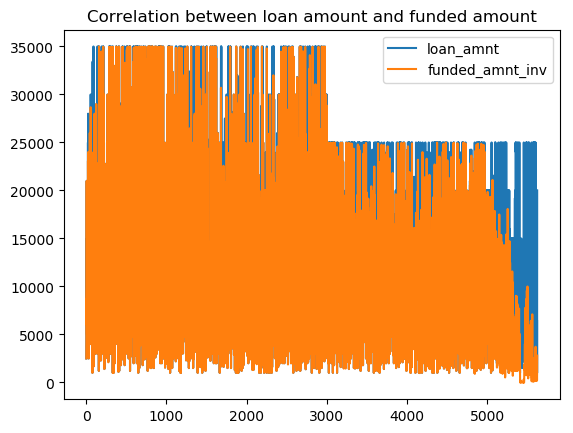

,loan_amnt,funded_amnt_inv
loan_amnt,1.000000,0.907129
funded_amnt_inv,0.907129,1.000000


In [70]:
# Plotting the correlation between loan amount and funded amount of the defaulted loans

## Helps in restoring the rc params from the Matplotlib's internal defaults
plt.rcdefaults()
plt.figure(figsize=(20, 25))

## We segregated these two columns into a separate dataframe because for the ease of plotting the graph
funded_loan_amount = pd.DataFrame({'loan_amnt': defaulter_df['loan_amnt'], 'funded_amnt_inv': defaulter_df['funded_amnt_inv']})

funded_loan_amount.plot(kind='line', subplots=False)
plt.title('Correlation between loan amount and funded amount')
plt.show()

# Now, lets see a correlation map between the variables of our new prepared df 'funded_loan_amount'
funded_corr_mat = funded_loan_amount.corr()
funded_corr_mat


<Figure size 2000x2500 with 0 Axes>

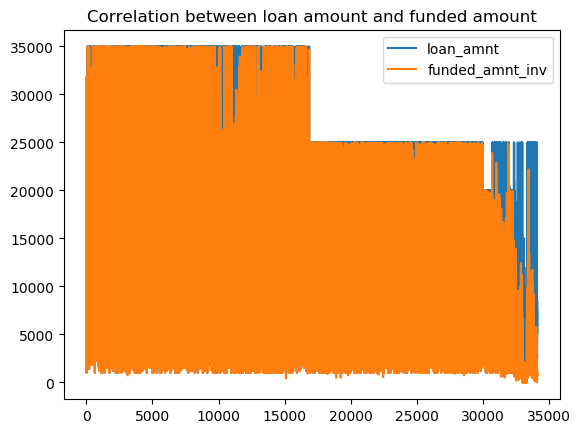

,loan_amnt,funded_amnt_inv
loan_amnt,1.000000,0.946748
funded_amnt_inv,0.946748,1.000000


In [71]:
# Plotting the correlation between loan amount and funded amount of the non-defaulted loans

## Helps in restoring the rc params from the Matplotlib's internal defaults
plt.rcdefaults()
plt.figure(figsize=(20, 25))

## We segregated these two columns into a separate dataframe because for the ease of plotting the graph
non_defaulted_funded_loan_amount = pd.DataFrame({'loan_amnt': non_defaulter_df['loan_amnt'], 
                                                 'funded_amnt_inv': non_defaulter_df['funded_amnt_inv']})

non_defaulted_funded_loan_amount.plot(kind='line', subplots=False)
plt.title('Correlation between loan amount and funded amount')
plt.show()

# Now, lets see a correlation map between the variables of our new prepared df 'funded_loan_amount'
non_defaulted_funded_corr_mat = non_defaulted_funded_loan_amount.corr()
non_defaulted_funded_corr_mat

### Bivariate analysis --> categorical variables


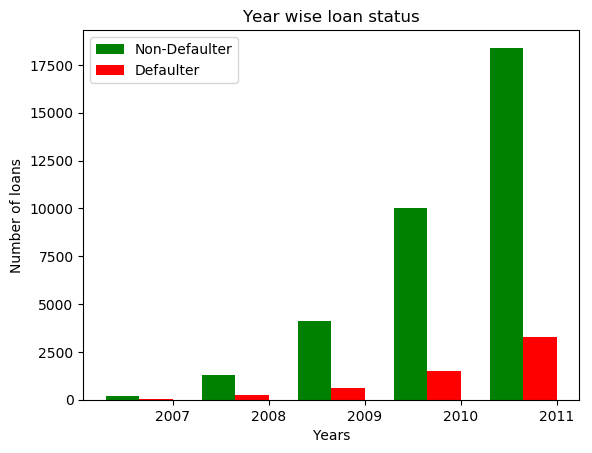

In [72]:
## Plotting the analysis of year and loan_status

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.

issue_d_fully_paid = non_defaulter_df.groupby(non_defaulter_df.issue_d.dt.year).size()
issue_d_charged_off = defaulter_df.groupby(defaulter_df.issue_d.dt.year).size()

# Fed the x-locations for the graph
ind = np.arange(max(len(issue_d_fully_paid), len(issue_d_charged_off)))  # the x locations for the groups

# Specified the width for the bars
width = 0.35      

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(ind-width,issue_d_fully_paid,width,color='green',label='Non-Defaulter')
ax.bar(ind,issue_d_charged_off,width,color='red',label='Defaulter')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((issue_d_fully_paid.index))
plt.xlabel('Years')
plt.ylabel('Number of loans')
plt.title('Year wise loan status')
plt.legend()

plt.show()

## Year 2011 has the record of taking the most loans

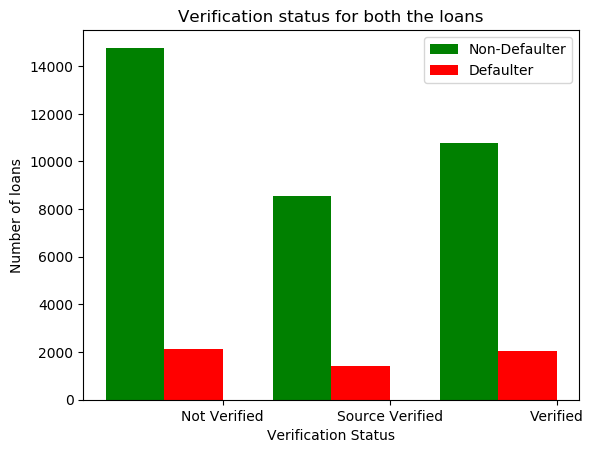

In [73]:
## Plotting the analysis of verification status and loan status

plt.rcdefaults()

verification_status_fully_paid = non_defaulter_df.groupby(non_defaulter_df.verification_status).size()
verification_status_charged_off = defaulter_df.groupby(defaulter_df.verification_status).size()

ind = np.arange(max(len(verification_status_fully_paid), len(verification_status_charged_off)))  
width = 0.35       

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(ind-width,verification_status_fully_paid,width,color='green',label='Non-Defaulter')
ax.bar(ind,verification_status_charged_off,width,color='red',label='Defaulter')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((verification_status_fully_paid.index))
plt.xlabel('Verification Status')
plt.ylabel('Number of loans')
plt.title('Verification status for both the loans')
plt.legend()

plt.show()

## Year 2011 has the record of taking the most loans

<Figure size 20000x2500 with 0 Axes>

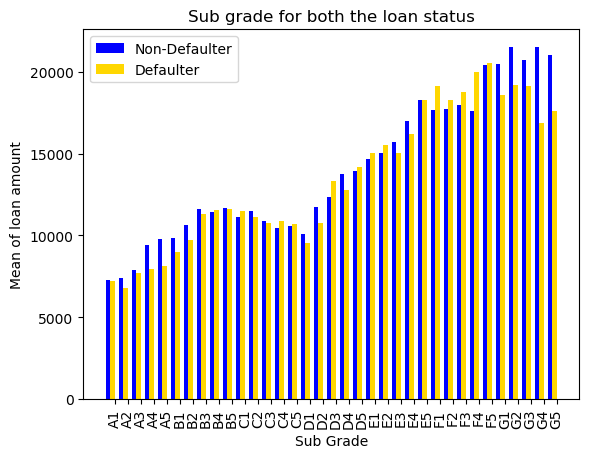

In [74]:
## Analysis of sub grade and loan status

plt.rcdefaults()
plt.figure(figsize=(200,25))

grade_1 = non_defaulter_df.groupby(non_defaulter_df.sub_grade).loan_amnt.mean()
grade_2 = defaulter_df.groupby(defaulter_df.sub_grade).loan_amnt.mean()

ind = np.arange(max(len(grade_1), len(grade_2)))
width = 0.35

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(ind-width, grade_1, width, color='blue', label='Non-Defaulter')
ax.bar(ind, grade_2, width, color='gold', label='Defaulter')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels((grade_1.index))

plt.xticks(rotation=90)
plt.xlabel('Sub Grade')
plt.ylabel('Mean of loan amount')
plt.title('Sub grade for both the loan status')
plt.legend()

plt.show()

## Inference: lower the grade higher is the loan amount and risk

<Figure size 20000x2500 with 0 Axes>

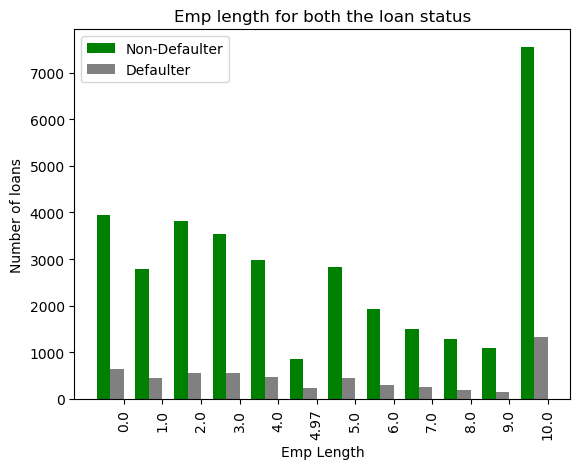

In [75]:
## Analysis of employment duration and loan status

plt.rcdefaults()
plt.figure(figsize=(200,25))

emp_length_1 = round(non_defaulter_df.groupby(non_defaulter_df.emp_length).size())
emp_length_2 = round(defaulter_df.groupby(defaulter_df.emp_length).size())

ind = np.arange(max(len(emp_length_1), len(emp_length_2)))
width = 0.35

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(ind-width, emp_length_1, width, color='green', label='Non-Defaulter')
ax.bar(ind, emp_length_2, width, color='grey', label='Defaulter')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels((emp_length_1.index))

plt.xticks(rotation=90)
plt.xlabel('Emp Length')
plt.ylabel('Number of loans')
plt.title('Emp length for both the loan status')
plt.legend()

plt.show()

## Inference: Employees who have been in the company for longer duration take good amount of loans, however
## there is not much deviation observed in defaulting the loans part.

In [76]:
## Next comes the analysis of state, purpose and the loan status (for defaulters)

# So, for this we can create a pivot table
defaulter_df['purpose'] = defaulter_df["purpose"].astype("category")
defaulter_pvt_df = pd.pivot_table(defaulter_df, index=["purpose"], values="loan_status", 
                                    columns="addr_state", aggfunc=[len])

# Drop level helps us in removing the specified index
defaulter_pvt_df.columns = defaulter_pvt_df.columns.droplevel(0)
defaulter_pvt_df

addr_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
purpose,,,,,,,,,,,,,,,,,,,,,
car,NaN,1.0,3.0,4.0,26.0,2.0,3.0,NaN,NaN,16.0,...,NaN,NaN,11.0,1.0,4.0,NaN,4.0,1.0,NaN,NaN
credit_card,3.0,7.0,2.0,17.0,144.0,9.0,10.0,4.0,3.0,46.0,...,3.0,1.0,25.0,3.0,11.0,1.0,17.0,8.0,3.0,1.0
debt_consolidation,7.0,25.0,9.0,56.0,548.0,54.0,50.0,7.0,2.0,232.0,...,6.0,1.0,139.0,16.0,91.0,5.0,66.0,33.0,9.0,1.0
educational,NaN,1.0,1.0,3.0,10.0,2.0,NaN,NaN,NaN,9.0,...,NaN,NaN,5.0,2.0,1.0,NaN,NaN,1.0,NaN,NaN
home_improvement,1.0,6.0,2.0,2.0,60.0,6.0,9.0,NaN,NaN,40.0,...,NaN,NaN,18.0,2.0,12.0,NaN,3.0,2.0,1.0,1.0
house,NaN,NaN,NaN,2.0,15.0,1.0,1.0,NaN,NaN,7.0,...,NaN,NaN,4.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN
major_purchase,NaN,3.0,NaN,6.0,35.0,2.0,5.0,NaN,NaN,30.0,...,NaN,NaN,17.0,NaN,3.0,NaN,4.0,3.0,1.0,NaN
medical,1.0,1.0,1.0,1.0,17.0,1.0,1.0,NaN,NaN,9.0,...,NaN,NaN,6.0,NaN,4.0,NaN,3.0,1.0,1.0,NaN
moving,NaN,1.0,NaN,2.0,23.0,NaN,NaN,1.0,NaN,5.0,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [77]:
## Next comes the analysis of state, purpose and the loan status (for defaulters)

# So, for this we can create a pivot table
non_defaulter_df['purpose'] = non_defaulter_df["purpose"].astype("category")
non_defaulter_pvt_df = pd.pivot_table(non_defaulter_df, index=["purpose"], values="loan_status", 
                                    columns="addr_state", aggfunc=[len])
non_defaulter_pvt_df.columns = non_defaulter_pvt_df.columns.droplevel(0)
non_defaulter_pvt_df

addr_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
purpose,,,,,,,,,,,,,,,,,,,,,
car,1.0,21.0,14.0,31.0,202.0,28.0,30.0,4.0,5.0,100.0,...,2.0,1.0,106.0,11.0,58.0,1.0,28.0,22.0,8.0,4.0
credit_card,8.0,42.0,29.0,112.0,916.0,120.0,75.0,37.0,11.0,294.0,...,10.0,2.0,351.0,36.0,164.0,6.0,101.0,67.0,19.0,7.0
debt_consolidation,26.0,200.0,97.0,308.0,2904.0,328.0,305.0,106.0,42.0,1039.0,...,22.0,3.0,1041.0,106.0,599.0,22.0,337.0,177.0,85.0,36.0
educational,NaN,3.0,1.0,4.0,35.0,8.0,4.0,NaN,NaN,20.0,...,NaN,1.0,11.0,2.0,5.0,NaN,7.0,2.0,NaN,NaN
home_improvement,10.0,35.0,21.0,66.0,335.0,38.0,63.0,9.0,16.0,218.0,...,3.0,1.0,200.0,17.0,100.0,3.0,54.0,36.0,8.0,3.0
house,NaN,6.0,1.0,10.0,50.0,12.0,5.0,2.0,1.0,38.0,...,1.0,NaN,15.0,2.0,13.0,NaN,6.0,5.0,NaN,1.0
major_purchase,3.0,26.0,21.0,46.0,288.0,34.0,45.0,8.0,5.0,146.0,...,2.0,2.0,146.0,5.0,62.0,4.0,38.0,23.0,12.0,13.0
medical,2.0,4.0,5.0,19.0,116.0,16.0,8.0,1.0,1.0,41.0,...,NaN,NaN,56.0,10.0,12.0,1.0,11.0,3.0,2.0,2.0
moving,NaN,3.0,NaN,17.0,85.0,13.0,8.0,4.0,2.0,40.0,...,NaN,NaN,29.0,1.0,22.0,1.0,6.0,5.0,2.0,NaN


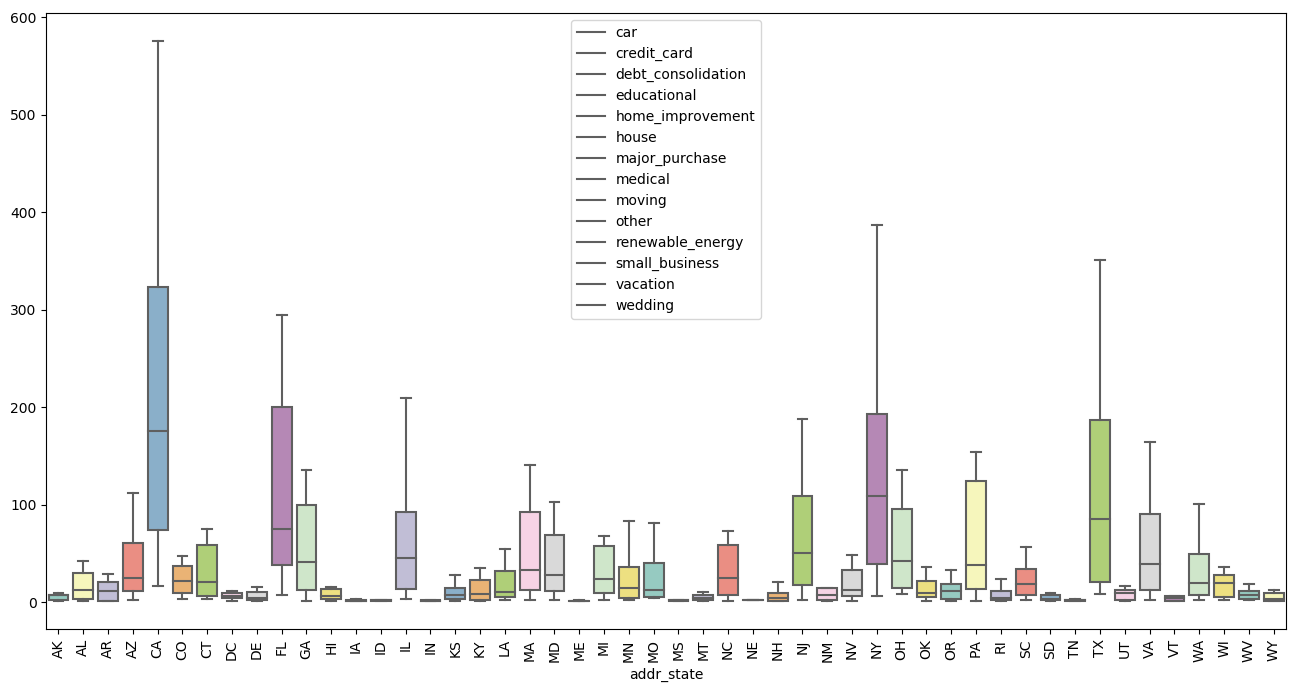

In [78]:
## Box plot of non defaulter's, loan status vs addr_state

plt.rcdefaults()
plt.figure(figsize=(16,8))
sns.boxplot(data=non_defaulter_pvt_df, showfliers=False, palette="Set3")
plt.xticks(rotation=90)
plt.legend(non_defaulter_pvt_df.index)
plt.show()

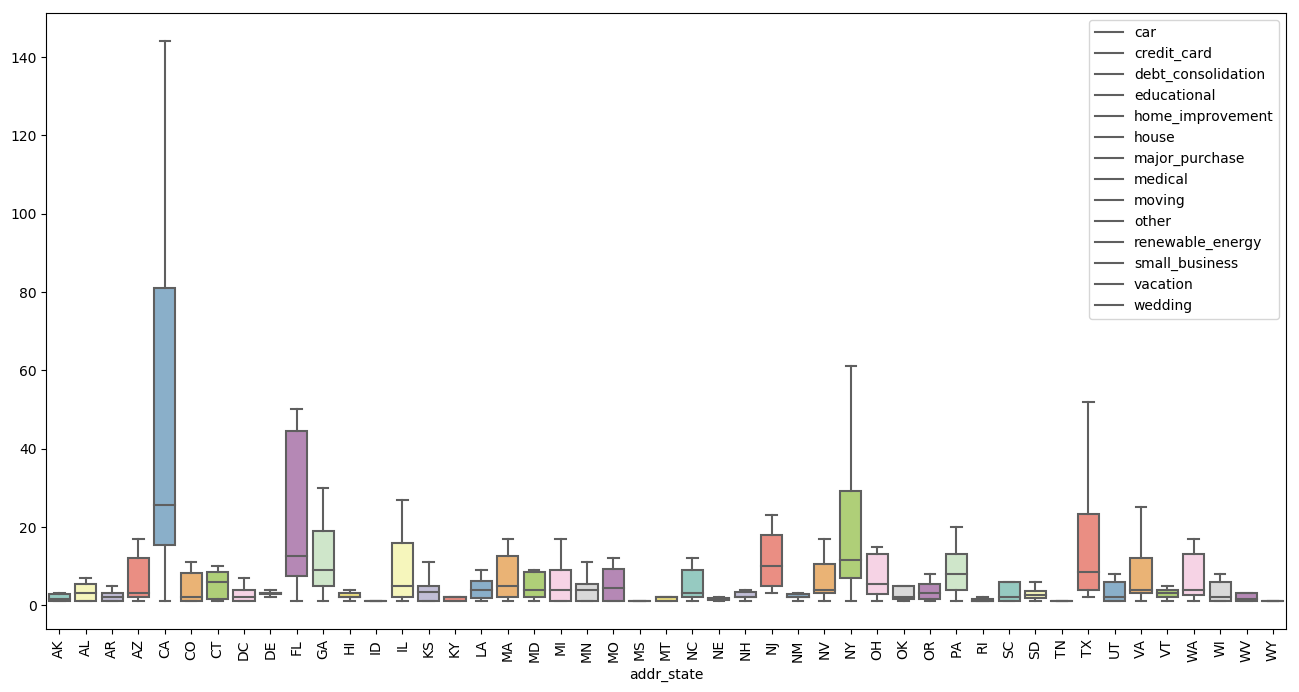

In [79]:
## Box plot for defaulters, loan status vs addr_state

plt.rcdefaults()
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=defaulter_pvt_df, showfliers=False, palette="Set3")
plt.xticks(rotation=90)
plt.legend(defaulter_pvt_df.index)
plt.show()

## Inference: People who took loan(s) for debt consolidation have the highest chances of defaulting their loans
# CA state has highest such defaulters

In [80]:
## Analysis of verification status, loan status based on annual income (for defaulters)

verification_status_df = pd.pivot_table(defaulter_df, index=["verification_status"], values="annual_inc", 
                                        columns="loan_default_stat", aggfunc=[np.mean])
verification_status_df.columns = verification_status_df.columns.droplevel(0)
verification_status_df

loan_default_stat,Defaulter
verification_status,
Not Verified,55583.202792
Source Verified,60708.453082
Verified,70776.822984


In [81]:
## Analysis of verification status, loan status based on annual income (for non-defaulters)

verification_status_defaulter_df = pd.pivot_table(non_defaulter_df, index=["verification_status"], values="annual_inc", 
                                                  columns="loan_default_stat", aggfunc=[np.mean])
verification_status_defaulter_df.columns = verification_status_defaulter_df.columns.droplevel(0)
verification_status_defaulter_df

## Inference: In both the cases for all the verification_status (not verified, verified and source verified), always the
# non-defaulters have a higher annual_inc than those of defaulters

loan_default_stat,Non-Defaulter
verification_status,
Not Verified,61841.962474
Source Verified,69763.314272
Verified,81544.504405


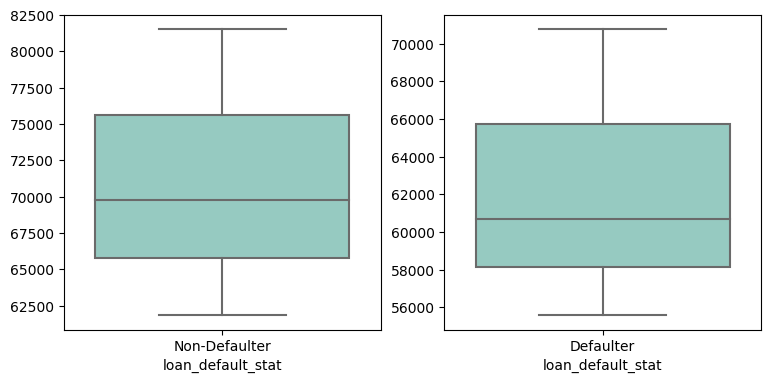

In [82]:
plt.rcdefaults()
plt.figure(figsize=(9,9))

plt.subplot(2, 2, 1)
sns.boxplot(data=verification_status_defaulter_df, showfliers=False, palette="Set3")

plt.subplot(2, 2, 2)
sns.boxplot(data=verification_status_df, showfliers=False, palette="Set3")

plt.xticks()
plt.show()

In [83]:
loan_stat_pvt_df = pd.pivot_table(df_master, index=["interest_rate_range"], 
                                    values="install_income_permonth", columns=["loan_default_stat","term"], aggfunc=[np.median])
loan_stat_pvt_df.columns = loan_stat_pvt_df.columns.droplevel(0)
loan_stat_pvt_df

## Inference: From this table, for each term the installment to income ratio are as shown
# This can tell us that whether or not a loan is likely to default or not.

loan_default_stat   Defaulter        Non-Defaulter       
term                       36     60            36     60
interest_rate_range                                      
10-15                   6.555  6.620          6.03  5.700
15-20                   7.030  7.120          7.00  6.535
20-25                   8.875  9.245          7.15  7.700
5-10                    5.395  4.885          4.89  3.860

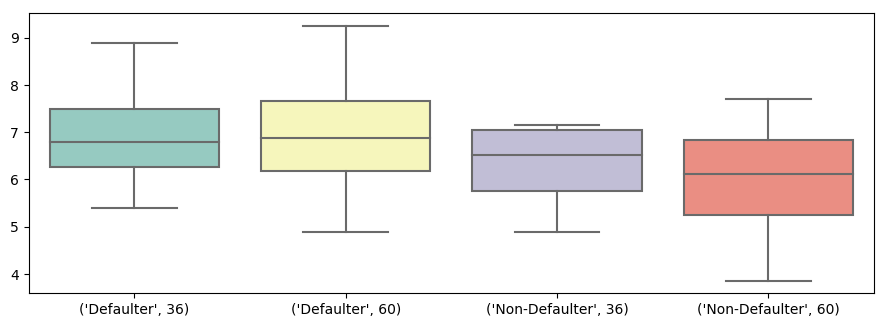

In [84]:
## Boxplot of 'loan_stat_pvt_df' 

plt.rcdefaults()
plt.figure(figsize=(24,8))

plt.subplot(2, 2, 1)
sns.boxplot(data=loan_stat_pvt_df, showfliers=False, palette="Set3")
plt.show()